# **Rani Son**

## **Part 2 R**
## **A Statistical Analaysis of Nutrition**

## **First, I imputed the dataset of food items that constaind their weight in grams, Satured fat and Cholesterol.**

In [24]:
library(readr)
DF <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/nutrition_subset.csv", show_col_types = FALSE)

In [25]:
summary(DF)

  food item         weight_in_grams  saturated_fat      cholesterol     
 Length:961         Min.   :   0.4   Min.   :  0.000   Min.   :   0.00  
 Class :character   1st Qu.:  32.0   1st Qu.:  0.000   1st Qu.:   0.00  
 Mode  :character   Median : 113.0   Median :  0.400   Median :   0.00  
                    Mean   : 149.4   Mean   :  3.988   Mean   :  32.55  
                    3rd Qu.: 218.0   3rd Qu.:  3.300   3rd Qu.:  20.00  
                    Max.   :1542.0   Max.   :119.900   Max.   :2053.00  

In [26]:
print(DF[order(DF$saturated_fat, decreasing = TRUE), ] )

# A tibble: 961 × 4
   `food item`                         weight_in_grams saturated_fat cholesterol
   <chr>                                         <dbl>         <dbl>       <dbl>
 1 CHEESECAKE                    1 CA…            1110         120.         2053
 2 ICE CREAM; VANLLA; RICH 16% FT1/2 …            1188         118.          703
 3 YELLOWCAKE W/ CHOCFRSTNG;COMML1 CA…            1108          92           609
 4 CREME PIE                     1 PIE             910          90.1          46
 5 LARD                          1 CUP             205          80.4         195
 6 ICE CREAM; VANLLA; REGULR 11% 1/2 …            1064          71.3         476
 7 CARROT CAKE;CREMCHESE FRST;REC1 CA…            1536          66          1183
 8 BUTTER; SALTED                1/2 …             113          57.1         247
 9 BUTTER; UNSALTED              1/2 …             113          57.1         247
10 DEVIL'S FOOD CAKE;CHOCFRST;FMX1 CA…            1107          55.6         598
# ℹ 951 

## **The Five Food Items with the highest amount of Saturated fat are, Cheesecake, Vanillia Ice Cream, Yellowcake, Cremepie and Lard.**

## **Comparing food items base on their size can be problematic as you could be comparing a tbsp of butter to an entire cheesecake, which is not helpful.**

In [27]:
DF$saturated_fat_per_gram <- DF$saturated_fat / DF$weight_in_grams

In [28]:
print(DF[order(DF$saturated_fat_per_gram, decreasing = TRUE), ] )

# A tibble: 961 × 5
   `food item`  weight_in_grams saturated_fat cholesterol saturated_fat_per_gram
   <chr>                  <dbl>         <dbl>       <dbl>                  <dbl>
 1 BUTTER; SAL…            14             7.1          31                  0.507
 2 BUTTER; UNS…            14             7.1          31                  0.507
 3 BUTTER; SAL…           113            57.1         247                  0.505
 4 BUTTER; UNS…           113            57.1         247                  0.505
 5 BUTTER; SAL…             5             2.5          11                  0.5  
 6 BUTTER; UNS…             5             2.5          11                  0.5  
 7 LARD       …            13             5.1          12                  0.392
 8 LARD       …           205            80.4         195                  0.392
 9 IMITATION C…             2             0.7           0                  0.35 
10 CHOCOLATE; …            28.4           9             0                  0.317
# ℹ 951 

## **The new top five foods ordered by Satured fat per gram are Butter Salted 1 TBSP, Butter Unsalted 1 TBSP, Butter Salted 1/2 Cup, Butter Unsalted 1/2 Cup and Butter Salted 1 Pat. The food with the most Saturated Fat Per Gram is Butter Salted 1 TBSP.**

In [29]:
DF$saturated_fat_per_gram <- scale(x = DF$saturated_fat_per_gram)

In [30]:
three_sigma_rule <- (DF$saturated_fat_per_gram < -3 |
                     DF$saturated_fat_per_gram > 3 )

In [31]:
cat ("There are", sum(three_sigma_rule), "outliers \n\n")

There are 15 outliers 



In [32]:
cat("The scaled age values that are outliers: \n\n")
DF$saturated_fat_per_gram[which(three_sigma_rule)]

The scaled age values that are outliers: 



[1] 4.238469 3.936637 4.202078 3.940837 7.079055 7.079055 5.368580 3.276520
 [9] 5.370282 3.222049 7.106775 7.106775 6.998763 6.998763 4.730522

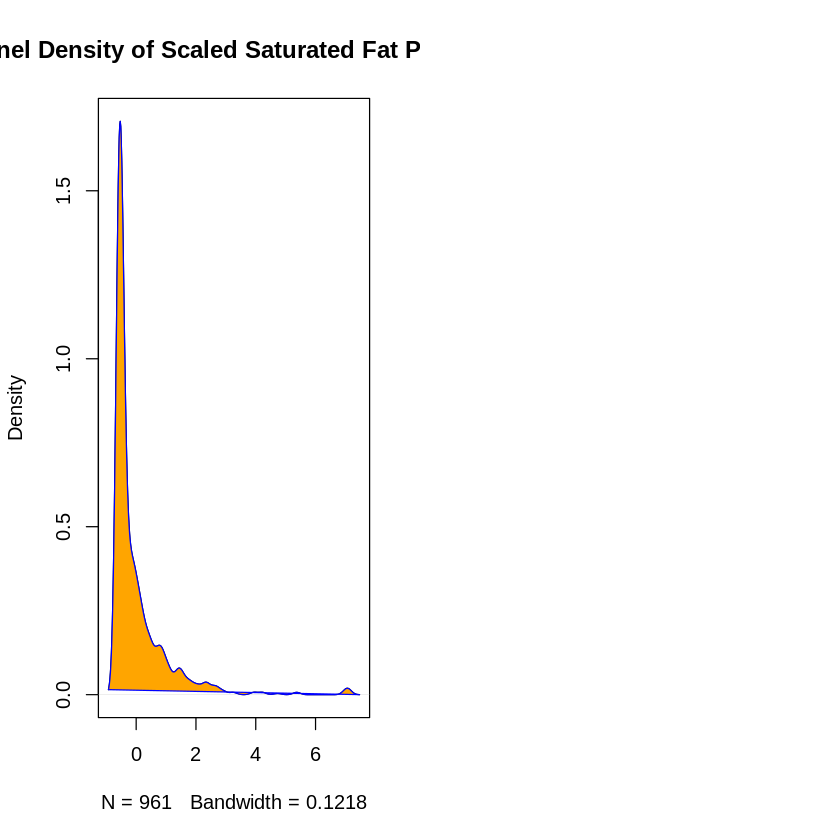

In [34]:
par(mfrow=c(1, 2))

d1 <- density(DF$saturated_fat_per_gram)

plot(d1, main="Kernel Density of Scaled Saturated Fat Per Gram")

polygon(d1, col="orange", border="blue")


In [35]:
cat("No. missing values in weight = ", sum(is.na(DF$weight_in_grams)), "\n\n")
cat("No. missing values in saturated fat = ", sum(is.na(DF$saturated_fat)), "\n\n")
cat("No. missing values in cholesterol = ", sum(is.na(DF$cholesterol)), "\n\n")

No. missing values in weight =  0 

No. missing values in saturated fat =  0 

No. missing values in cholesterol =  0 



## **There does not appear to be any missing values so no imputation is needed.**

In [37]:
DF$weight_in_grams <- scale(x = DF$weight_in_grams)
DF$saturated_fat <- scale(x = DF$saturated_fat)
DF$cholesterol <- scale(x = DF$cholesterol)

In [38]:
three_sigma_rule <- (DF$weight_in_grams < -3 |
                     DF$weight_in_grams > 3 )

In [44]:
cat ("There are", sum(three_sigma_rule), "weight outliers \n\n")

There are 17 weight outliers 



In [45]:
three_sigma_rule <- (DF$saturated_fat < -3 |
                     DF$saturated_fat > 3 )

In [46]:
cat ("There are", sum(three_sigma_rule), "saturated fat outliers \n\n")

There are 20 saturated fat outliers 



In [47]:
three_sigma_rule <- (DF$cholesterol < -3 |
                     DF$cholesterol > 3 )

In [48]:
cat ("There are", sum(three_sigma_rule), "cholesterol outliers \n\n")

There are 17 cholesterol outliers 



## **In summary, when sorting by just the saturated fat, the 5 food items with the highest fat were Cheesecake, Vanillia Ice Cream, Yellowcake, Cremepie and Lard.**

## **When comparing Satured fat per gram a new list was made and the new top five foods were, Butter Salted 1 TBSP, Butter Unsalted 1 TBSP, Butter Salted 1/2 Cup, Butter Unsalted 1/2 Cup and Butter Salted 1 Pat**

## **After standardizing the Saturated Fat Per gram, I found that there were 15 outliers.**

## **Then, I determined that were were no missing values in all three of the numeric values.**

## **Lastly, For weight in grams there were 17 outliers,for saturated fat, there were 20 outliers and for cholesterol there were 17 outliers.**